In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
# from customplotting.general import plot_xy, save_fig
from functions import *
from scipy import signal
# from Fit_functions_with_irf import *
from scipy.optimize import Bounds

In [2]:
"""Recycle params for plotting"""
plt.rc('xtick', labelsize = 30)
plt.rc('xtick.major', pad = 3)
plt.rc('ytick', labelsize = 30)
plt.rc('lines', lw = 3.5, markersize = 20.5)
plt.rc('legend', fontsize = 30)
plt.rc('axes', linewidth = 3.5)

In [3]:
names1=['Ref 1' , 'Ref 2' , 'Ref 3' , 'EDA 1' , 'EDA 2' , 'EDA 3' , 'IMN 1' , 'IMN 2' , 'IMN 3' , 'APTMS 1' , 'APTMS 2', 'APTMS 3']

# skip = 1

data = pd.read_csv('03_13_23_Cs17Br25_1.2M_EDA_IMN_APTMS_data.csv', delimiter=',',index_col=False, skiprows = 0)


In [4]:
print(data)
print(np.shape(data.values[:,1:]))


       Time (ns)  Ref 1  Ref 2  Ref 3  EDA 1  EDA 2  EDA 3  IMN 1   IMN 2  \
0          0.000    4.0    4.0    7.0    3.0    5.0    3.0     4.0    0.0   
1          0.128    1.0    4.0    7.0    3.0    3.0    2.0     1.0    2.0   
2          0.256    3.0    2.0    1.0    3.0    2.0    4.0     3.0    3.0   
3          0.384    0.0    6.0    2.0    2.0    6.0    2.0     1.0    8.0   
4          0.512    2.0    5.0    0.0    4.0    2.0    4.0     8.0    1.0   
...          ...    ...    ...    ...    ...    ...    ...     ...    ...   
31245   3999.360    NaN    NaN    NaN    NaN    NaN    NaN     NaN    NaN   
31246   3999.488    NaN    NaN    NaN    NaN    NaN    NaN     NaN    NaN   
31247   3999.616    NaN    NaN    NaN    NaN    NaN    NaN     NaN    NaN   
31248   3999.744    NaN    NaN    NaN    NaN    NaN    NaN     NaN    NaN   
31249   3999.872    NaN    NaN    NaN    NaN    NaN    NaN     NaN    NaN   

       IMN 3  APTMS 1  APTMS 2  APTMS 3  
0        3.0        0        3   

In [5]:
# print(np.shape(data)[])

In [8]:
### plotter = 3
# prange = np.argmin(data.values[:,plotter])
# plt.plot(data.values[:prange,0], data.values[:prange,plotter]/np.max(data.values[:prange,plotter]), label = 'A4', c= 'red')
# # plt.yscale('log')
# plt.show

size = np.int32(np.size(names1))

taus = np.zeros(size)
tau1 = np.zeros(size)
tau2 = np.zeros(size)
taua = np.zeros(size)
beta = np.zeros(size)
strfits = np.zeros(np.shape(data.values))
dubfits = np.zeros(np.shape(data.values))

peaktime = np.zeros(size)


prange = np.zeros(size)

scale = 1e9
for K in range (size):
    plotter = K +1

#     print(plotter)
    if (data.values[31249,plotter]==0):
        prange[K] = 31249
    elif (data.values[7812,plotter]==0):
        prange[K] = 7812
    elif (data.values[3906,plotter]==0):
        prange[K] = 3906
    else:
        print("ERROR")
        break
        
# print(prange)

for K in range (size):     
    plotter = K +1
#     print(np.int(prange[K]))
    peaktime[K] = np.argmax(data.values[:np.int32(prange[K]),plotter])
    time = data.values[np.int32(peaktime[K]):np.int32(prange[K]),0]
    stretchfit = stretch_exp_fit(data.values[np.int32(peaktime[K]):np.int32(prange[K]),plotter]/np.max(data.values[:np.int32(prange[K]),plotter]), time*1e-9, Tc = (0,1e4*1e-9), Beta = (0,1), A = (0,1), noise = (0,0.001))
    doublefit = double_exp_fit(data.values[np.int32(peaktime[K]):np.int32(prange[K]),plotter]/np.max(data.values[:np.int32(prange[K]),plotter]), time*1e-9, tau1_bounds=(0,1000*1e-9), a1_bounds=(0,1), tau2_bounds=(0,10000*1e-9), a2_bounds=(0,1))

    taus[K] = stretchfit[3]*scale
    beta[K] = stretchfit[1]
    tau1[K] = doublefit[0]*scale
    tau2[K] = doublefit[2]*scale
    taua[K] = doublefit[4]*scale
    strfits[np.int32(peaktime[K]):np.int32(prange[K]),K+1] = stretchfit[4]
    dubfits[np.int32(peaktime[K]):np.int32(prange[K]),K+1] = doublefit[5]

#     print("Fitted" + f" {K+1}")
    print("a1 + a2 for sample" + f" {K+1} =" + f" {doublefit[1]+doublefit[3]}")


    
#     plt.plot(time, data.values[peaktime:prange,plotter]/np.max(data.values[:prange,plotter]), c= 'red', lw = 0.5)
#     plt.yscale('log')
#     plt.show()

a1 + a2 for sample 1 = 1.0024921864649416
a1 + a2 for sample 2 = 1.0035410088709398
a1 + a2 for sample 3 = 1.0032770616903814
a1 + a2 for sample 4 = 1.0035634585198951
a1 + a2 for sample 5 = 1.0043094759166993
a1 + a2 for sample 6 = 1.00805676465124
a1 + a2 for sample 7 = 1.0029693252361638
a1 + a2 for sample 8 = 1.0063562006342068
a1 + a2 for sample 9 = 1.0064582287659176
a1 + a2 for sample 10 = 0.7853451600661259
a1 + a2 for sample 11 = 0.8040213330795465
a1 + a2 for sample 12 = 0.8028763468042799


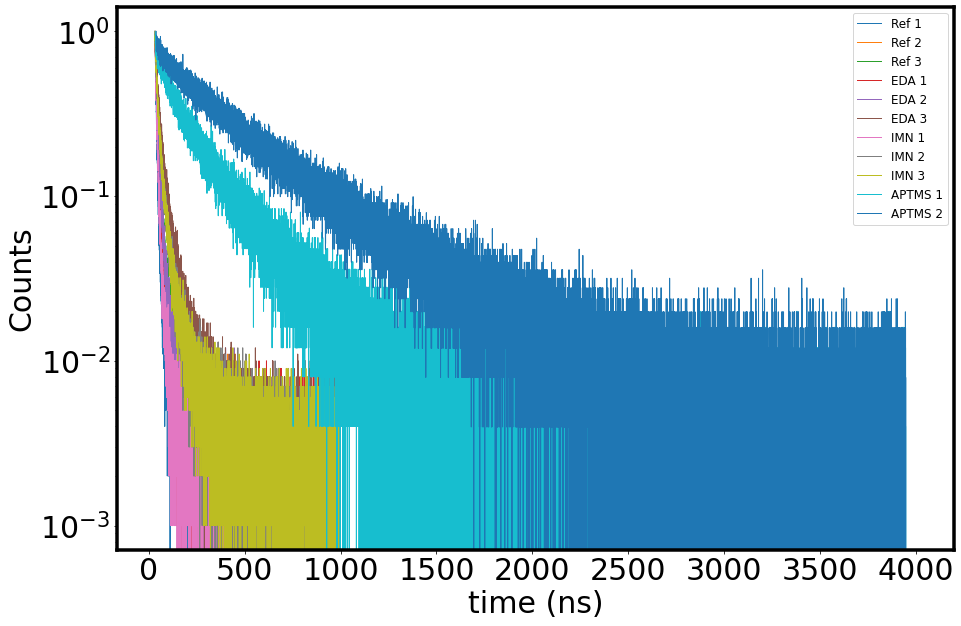

In [9]:
fig = plt.figure(figsize =(15, 10))
size2 = range(size-1)
# size2 = [0,1,2]



for K in size2:
    plotter = K+1
    time = data.values[np.int32(peaktime[K]):np.int32(prange[K]),0]

#     plt.plot(B1['XAxis'].values, B1['Counts'].values/np.max(B1['Counts'].values),'y', lw=1 , label='A1', alpha = 1)
    plt.plot(time, data.values[np.int32(peaktime[K]):np.int32(prange[K]),plotter]/np.max(data.values[:np.int32(prange[K]),plotter]), lw = 1,label = names1[K])
plt.yscale('log')
    
fs = 30


plt.xlabel('time (ns)',{'fontsize': fs})
plt.ylabel('Counts',{'fontsize': fs})
plt.legend(fontsize = "large",markerscale = 5)
plt.show()


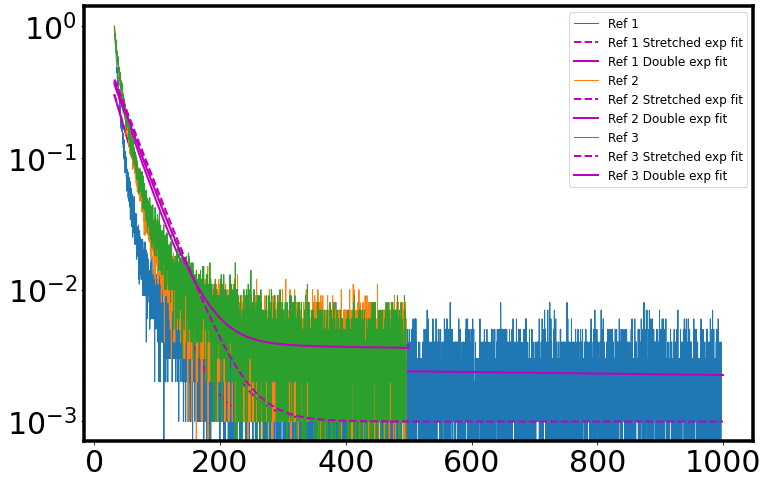

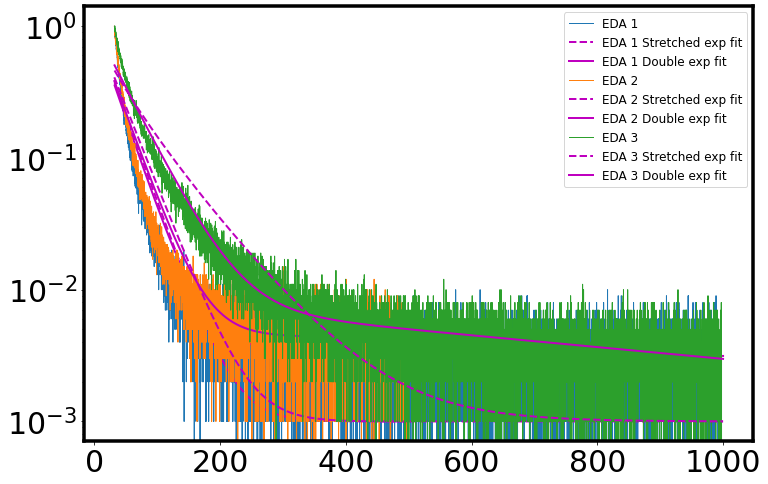

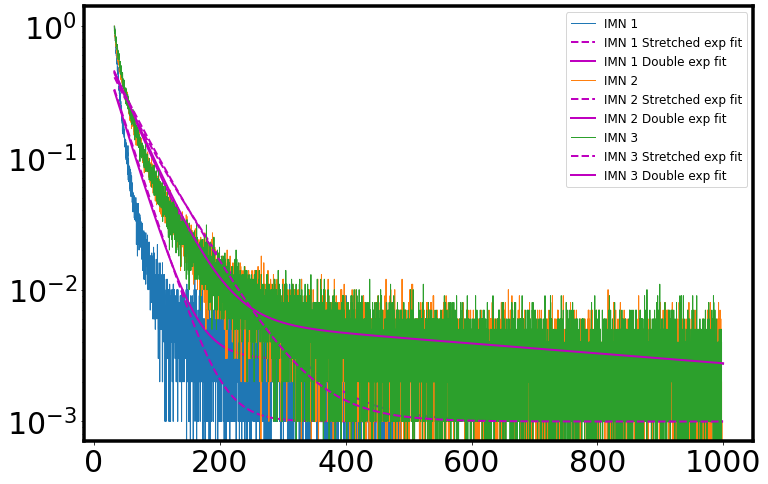

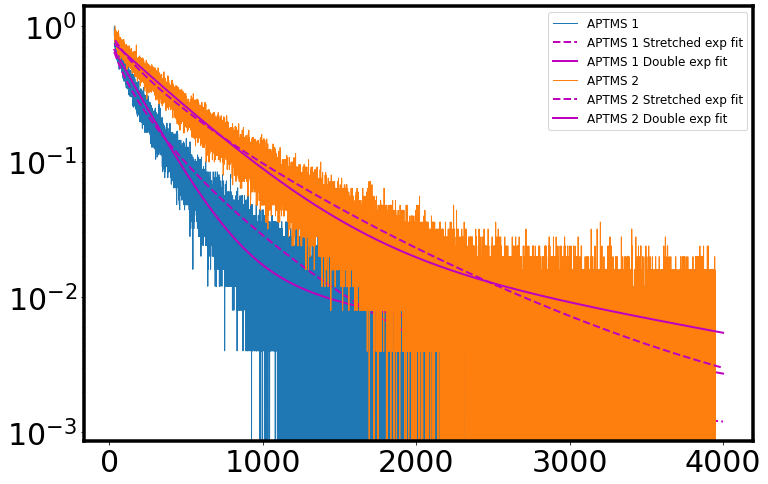

In [10]:
fig = plt.figure(figsize =(12, 8))
for K in [0,1,2]:
    plotter = K+1
    time = data.values[np.int32(peaktime[K]):np.int32(prange[K]),0]
    plt.plot(time, data.values[np.int32(peaktime[K]):np.int32(prange[K]),plotter]/np.max(data.values[:np.int32(prange[K]),plotter]), lw = 1,label = names1[K])
    plt.plot(time, strfits[np.int32(peaktime[K]):np.int32(prange[K]),plotter], 'm--', lw = 2, label=names1[K] + " Stretched exp fit")
    plt.plot(time, dubfits[np.int32(peaktime[K]):np.int32(prange[K]),plotter], 'm-', lw = 2, label=names1[K] + " Double exp fit")
#     plt.plot(time, strfits[np.int32(peaktime[K]):np.int32(prange[K]),plotter], 'm--', lw = 2, )
#     plt.plot(time, dubfits[np.int32(peaktime[K]):np.int32(prange[K]),plotter], 'm-', lw = 2, )    
    
plt.yscale('log')
plt.legend(fontsize = "large",)

plt.show()


fig = plt.figure(figsize =(12, 8))
for K in [3,4,5]:
    plotter = K+1
    time = data.values[np.int32(peaktime[K]):np.int32(prange[K]),0]
    plt.plot(time, data.values[np.int32(peaktime[K]):np.int32(prange[K]),plotter]/np.max(data.values[:np.int32(prange[K]),plotter]), lw = 1,label = names1[K])
    plt.plot(time, strfits[np.int32(peaktime[K]):np.int32(prange[K]),plotter], 'm--', lw = 2, label=names1[K] + " Stretched exp fit")
    plt.plot(time, dubfits[np.int32(peaktime[K]):np.int32(prange[K]),plotter], 'm-', lw = 2, label=names1[K] + " Double exp fit")
#     plt.plot(time, strfits[np.int32(peaktime[K]):np.int32(prange[K]),plotter], 'm--', lw = 2, )
#     plt.plot(time, dubfits[np.int32(peaktime[K]):np.int32(prange[K]),plotter], 'm-', lw = 2, )
    
    
plt.yscale('log')
plt.legend(fontsize = "large",)

plt.show()


fig = plt.figure(figsize =(12, 8))
for K in [6,7,8]:
    plotter = K+1
    time = data.values[np.int32(peaktime[K]):np.int32(prange[K]),0]
    plt.plot(time, data.values[np.int32(peaktime[K]):np.int32(prange[K]),plotter]/np.max(data.values[:np.int32(prange[K]),plotter]), lw = 1,label = names1[K])
    plt.plot(time, strfits[np.int32(peaktime[K]):np.int32(prange[K]),plotter], 'm--', lw = 2, label=names1[K] + " Stretched exp fit")
    plt.plot(time, dubfits[np.int32(peaktime[K]):np.int32(prange[K]),plotter], 'm-', lw = 2, label=names1[K] + " Double exp fit")
#     plt.plot(time, strfits[np.int32(peaktime[K]):np.int32(prange[K]),plotter], 'm--', lw = 2, )
#     plt.plot(time, dubfits[np.int32(peaktime[K]):np.int32(prange[K]),plotter], 'm-', lw = 2, )
    
    
plt.yscale('log')
plt.legend(fontsize = "large",)

plt.show()


fig = plt.figure(figsize =(12, 8))
for K in [9,10]:
    plotter = K+1
    time = data.values[np.int32(peaktime[K]):np.int32(prange[K]),0]
    plt.plot(time, data.values[np.int32(peaktime[K]):np.int32(prange[K]),plotter]/np.max(data.values[:np.int32(prange[K]),plotter]), lw = 1,label = names1[K])
    plt.plot(time, strfits[np.int32(peaktime[K]):np.int32(prange[K]),plotter], 'm--', lw = 2, label=names1[K] + " Stretched exp fit")
    plt.plot(time, dubfits[np.int32(peaktime[K]):np.int32(prange[K]),plotter], 'm-', lw = 2, label=names1[K] + " Double exp fit")
#     plt.plot(time, strfits[np.int32(peaktime[K]):np.int32(prange[K]),plotter], 'm--', lw = 2, )
#     plt.plot(time, dubfits[np.int32(peaktime[K]):np.int32(prange[K]),plotter], 'm-', lw = 2, )
    
    
plt.yscale('log')
plt.legend(fontsize = "large",)

plt.show()

In [ ]:
xsize = 3
ysize = 4
fig, axs = plt.subplots(ysize,xsize,sharex=False, sharey=False,figsize = (18,12))

for L in range(ysize):
    for K in range(xsize):
        plotter = K+1+xsize*L
        time = data.values[np.int32(peaktime[K]):np.int32(prange[K]),0]
        axs[L,K].plot(time, data.values[np.int32(peaktime[K]):np.int32(prange[K]),plotter]/np.max(data.values[:np.int32(prange[K]),plotter]), lw = 1,label = names1[K+3*L])
        axs[L,K].plot(time, strfits[np.int32(peaktime[K]):np.int32(prange[K]),plotter], 'm--', lw = 2, )
        axs[L,K].plot(time, dubfits[np.int32(peaktime[K]):np.int32(prange[K]),plotter], 'm-', lw = 2, )
        axs[L,K].legend(fontsize = "small",)

    
plt.yscale('log')
axs[2,1].set_xlabel("Time (ns)",fontsize = 30)
axs[1,0].set_ylabel("Counts",fontsize = 30)


plt.show()

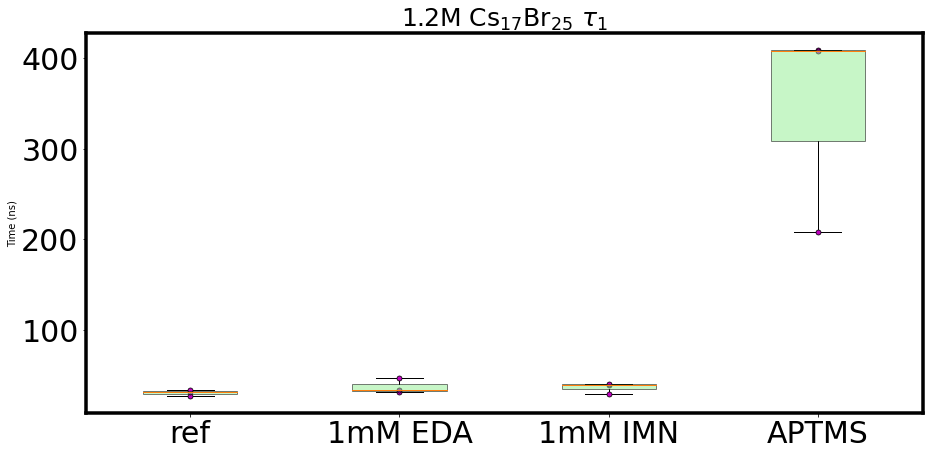

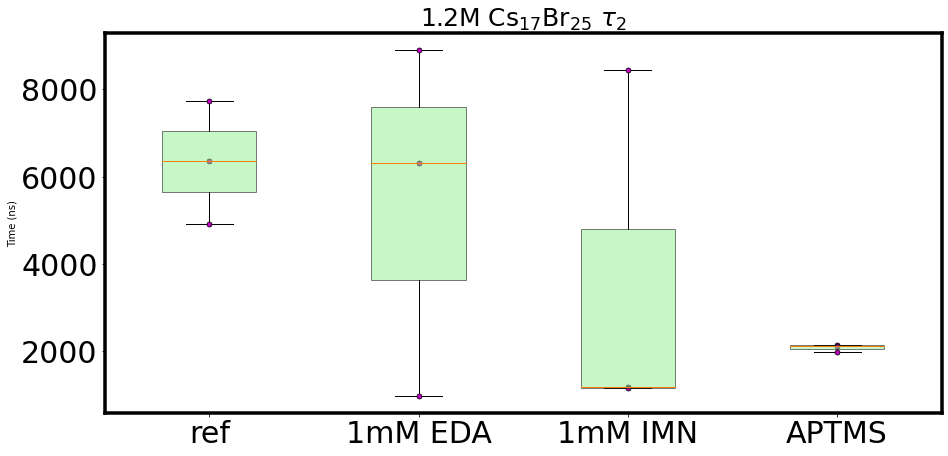

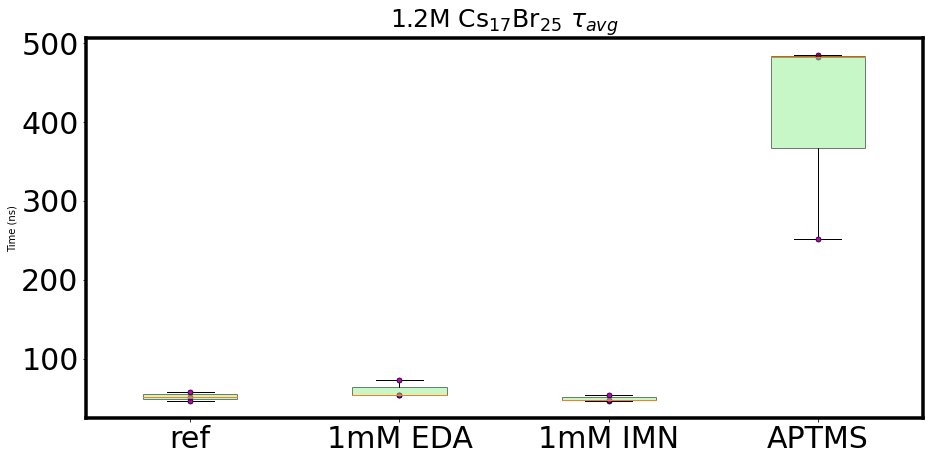

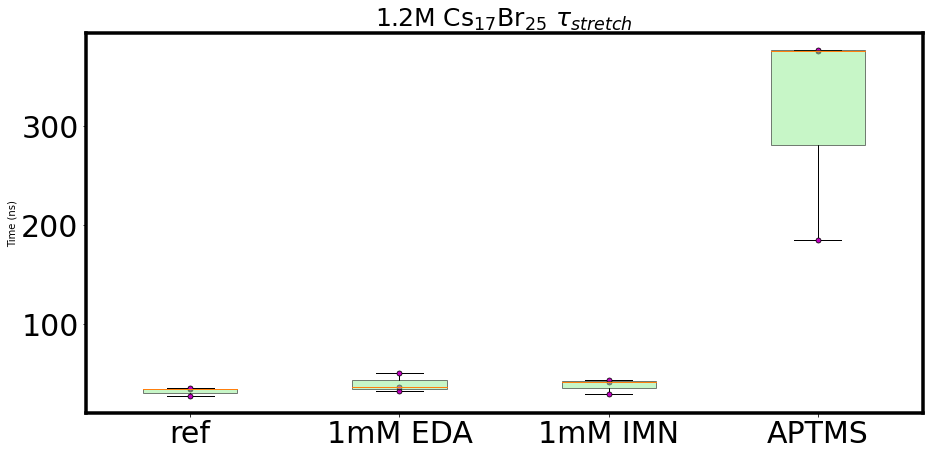

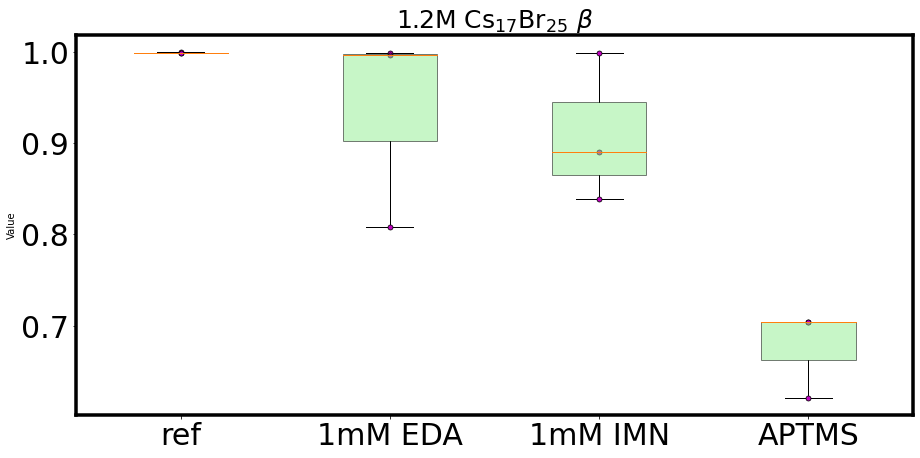

In [12]:
  
T1plotdata = [
    tau1[0:3],
    tau1[3:6],
    tau1[6:9],
    tau1[9:12],
    ]

T2plotdata = [
    tau2[0:3],
    tau2[3:6],
    tau2[6:9],
    tau2[9:12],
    ]

TAplotdata = [
    taua[0:3],
    taua[3:6],
    taua[6:9],
    taua[9:12],
    ]

TSplotdata = [
    taus[0:3],
    taus[3:6],
    taus[6:9],
    taus[9:12],
    ]

Bplotdata = [
    beta[0:3],
    beta[3:6],
    beta[6:9],
    beta[9:12],
    ]



xlabels = ['ref', '1mM EDA', '1mM IMN', 'APTMS']
title = r'1.2M Cs$_{17}$Br$_{25}$'
titlesize = '25'
##############Tau_1#########
fig = plt.figure(figsize =(15, 7))
ax = fig.add_subplot(111)
 
bp = ax.boxplot(T1plotdata, patch_artist=True, whis=100, boxprops=dict(facecolor='lightgreen', alpha = 0.5))
plt.plot([1,2,3,4],T1plotdata, ".", color = "m", ms = "10", mec = "k", mew = "0.75")

ax.set_xticklabels(xlabels)
plt.title(title + r" $\tau_{1}$", fontsize = titlesize)
plt.ylabel("Time (ns)")
plt.show()
print()
print()
print()
#############################
##############Tau_2########
fig = plt.figure(figsize =(15, 7))
ax = fig.add_subplot(111)

bp = ax.boxplot(T2plotdata, patch_artist=True, whis=100, boxprops=dict(facecolor='lightgreen', alpha = 0.5))
plt.plot([1,2,3,4],T2plotdata, ".", color = "m", ms = "10", mec = "k", mew = "0.75")

ax.set_xticklabels(xlabels)
plt.title(title + r" $\tau_{2}$", fontsize = titlesize)
plt.ylabel("Time (ns)")
plt.show()
print()
print()
print()
##########################
#########Tau_Avg##########
fig = plt.figure(figsize =(15, 7))
ax = fig.add_subplot(111)

bp = ax.boxplot(TAplotdata, patch_artist=True, whis=100, boxprops=dict(facecolor='lightgreen', alpha = 0.5))
plt.plot([1,2,3,4],TAplotdata, ".", color = "m", ms = "10", mec = "k", mew = "0.75")

ax.set_xticklabels(xlabels)
plt.title(title + r" $\tau_{avg}$", fontsize = titlesize)
plt.ylabel("Time (ns)")
plt.show()
print()
print()
print()
#############################
#########Tau_Stretch##########
fig = plt.figure(figsize =(15, 7))
ax = fig.add_subplot(111)
 
bp = ax.boxplot(TSplotdata, patch_artist=True, whis=100, boxprops=dict(facecolor='lightgreen', alpha = 0.5))
plt.plot([1,2,3,4],TSplotdata, ".", color = "m", ms = "10", mec = "k", mew = "0.75")

ax.set_xticklabels(xlabels)
plt.title(title + r" $\tau_{stretch}$", fontsize = titlesize)
plt.ylabel("Time (ns)")
plt.show()
print()
print()
print()
#######################
#########Beta##########

fig = plt.figure(figsize =(15, 7))
ax = fig.add_subplot(111)
 
bp = ax.boxplot(Bplotdata, patch_artist=True, whis=100, boxprops=dict(facecolor='lightgreen', alpha = 0.5))
plt.plot([1,2,3,4],Bplotdata, ".", color = "m", ms = "10", mec = "k", mew = "0.75")

ax.set_xticklabels(xlabels)
plt.title(title + r" $\beta$", fontsize = titlesize)
plt.ylabel("Value")
plt.show()